In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel('nba_player_data.xlsx')

In [2]:
data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
3667,2017-18,Regular%20Season,203107,212,Tomas Satoransky,1610612764,WAS,73,1643,201,...,233,286,52,15,83,131,524,823,3.45,0.63
3661,2017-18,Regular%20Season,1626150,208,Andrew Harrison,1610612763,MEM,56,1326,181,...,131,177,38,26,81,138,533,541,2.19,0.47
3949,2017-18,Regular%20Season,1627777,496,Georges Niang,1610612762,UTA,9,32,4,...,9,3,2,0,3,1,9,12,1.00,0.67
3685,2017-18,Regular%20Season,202687,232,Bismack Biyombo,1610612753,ORL,82,1495,183,...,468,66,21,95,84,158,468,810,0.79,0.25
6259,2020-21,Playoffs,202711,28,Bojan Bogdanovic,1610612762,UTA,11,390,64,...,47,16,10,0,23,27,199,171,0.70,0.43
4967,2019-20,Regular%20Season,1629012,22,Collin Sexton,1610612739,CLE,65,2143,513,...,204,192,65,7,158,142,1349,1045,1.22,0.41
4059,2017-18,Playoffs,1626153,66,Delon Wright,1610612761,TOR,10,215,31,...,22,23,15,9,9,10,86,108,2.56,1.67
3036,2016-17,Regular%20Season,201975,284,Jodie Meeks,1610612753,ORL,36,738,103,...,77,45,34,4,36,41,327,289,1.25,0.94
5805,2020-21,Regular%20Season,1626171,114,Bobby Portis,1610612749,MIL,66,1372,313,...,466,71,52,26,56,115,754,1009,1.27,0.93
2891,2016-17,Regular%20Season,201578,139,Marreese Speights,1610612746,LAC,82,1286,244,...,373,65,23,41,69,229,711,823,0.94,0.33


In [3]:
data.shape

(7293, 30)

### Data Cleaning & Analysis Preperation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7293 non-null   object 
 1   Season_type  7293 non-null   object 
 2   PLAYER_ID    7293 non-null   int64  
 3   RANK         7293 non-null   int64  
 4   PLAYER       7293 non-null   object 
 5   TEAM_ID      7293 non-null   int64  
 6   TEAM         7293 non-null   object 
 7   GP           7293 non-null   int64  
 8   MIN          7293 non-null   int64  
 9   FGM          7293 non-null   int64  
 10  FGA          7293 non-null   int64  
 11  FG_PCT       7293 non-null   float64
 12  FG3M         7293 non-null   int64  
 13  FG3A         7293 non-null   int64  
 14  FG3_PCT      7293 non-null   float64
 15  FTM          7293 non-null   int64  
 16  FTA          7293 non-null   int64  
 17  FT_PCT       7293 non-null   float64
 18  OREB         7293 non-null   int64  
 19  DREB  

In [5]:
#Drop 'RANK' & 'EFF' columns
data.drop(columns=['RANK','EFF'], inplace=True)

In [6]:
#Create the season start year column
data['season_start_year'] = data['Year'].str[:4].astype(int)

In [7]:
data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NOH', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS', 'NOP'], dtype=object)

In [8]:
#Change 'NOP' & 'NOH' to represent one team
data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)

C:\Users\zacha\AppData\Local\Temp\ipykernel_8516\1414534506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)


In [9]:
#Fix regular season
data['Season_type'].replace('Regular%20Season','RS', inplace=True)

C:\Users\zacha\AppData\Local\Temp\ipykernel_8516\3113285020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Season_type'].replace('Regular%20Season','RS', inplace=True)


In [10]:
#Seperate dataframes by regular season and playoffs
rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [11]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

In [12]:
#Array of columns that makes sense to aggregate
total_cols = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS']

### How has scoring evolved over time?

In [13]:
data.sample(10)

,Year,Season_type,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,season_start_year
3261,2016-17,Playoffs,203613,Jonathon Simmons,1610612759,SAS,15,306,62,136,...,28,29,9,2,11,30,158,2.64,0.82,2016
5112,2019-20,RS,1629014,Anfernee Simons,1610612757,POR,70,1449,214,536,...,152,97,26,10,61,135,579,1.59,0.43,2019
3929,2017-18,RS,1628443,Kadeem Allen,1610612738,BOS,18,107,6,22,...,11,12,3,2,9,15,19,1.33,0.33,2017
6143,2020-21,RS,1628981,Bruno Fernando,1610612737,ATL,33,226,18,44,...,78,10,4,3,21,23,51,0.48,0.19,2020
2041,2014-15,Playoffs,203268,Jorge Gutierrez,1610612749,MIL,1,12,1,2,...,1,1,0,0,0,1,2,0.00,0.00,2014
606,2012-13,Playoffs,202962,Greg Smith,1610612745,HOU,5,59,6,9,...,13,0,2,2,4,9,18,0.00,0.50,2012
3390,2016-17,Playoffs,1718,Paul Pierce,1610612746,LAC,7,101,8,18,...,14,7,2,0,4,11,21,1.75,0.50,2016
143,2012-13,RS,203077,Michael Kidd-Gilchrist,1610612766,CHA,78,2025,281,613,...,455,117,54,70,101,164,704,1.16,0.54,2012
5624,2019-20,Playoffs,203077,Michael Kidd-Gilchrist,1610612742,DAL,6,55,4,14,...,6,3,1,1,1,8,14,3.00,1.00,2019
3434,2016-17,Playoffs,1627787,Kyle Wiltjer,1610612745,HOU,1,5,1,1,...,0,0,0,0,0,0,3,0.00,0.00,2016


In [14]:
#Calculate total FGM per season
fgm_per_season = {}
for i in range(min(data['season_start_year']), max(data['season_start_year']) +1):
    fgm_sum = int(data[data['season_start_year'] == i]['FGM'].sum())
    fgm_per_season[i] = fgm_sum
fgm_per_season

{2012: 97235,
 2013: 99251,
 2014: 98251,
 2015: 100351,
 2016: 102147,
 2017: 103729,
 2018: 107374,
 2019: 92997,
 2020: 95849,
 2021: 106569}

In [15]:
#Calculate total 3PM per season
threes_per_season = {}
for i in range(min(data['season_start_year']), max(data['season_start_year']) +1):
    threes_sum = int(data[data['season_start_year'] == i]['FG3M'].sum())
    threes_per_season[i] = threes_sum
threes_per_season

{2012: 18808,
 2013: 20480,
 2014: 20724,
 2015: 22524,
 2016: 25408,
 2017: 27530,
 2018: 29817,
 2019: 28032,
 2020: 29549,
 2021: 32733}

In [16]:
#Calculate total 3PA per season
threes_attempted_per_season = {}
for i in range(min(data['season_start_year']), max(data['season_start_year']) +1):
    threes_attempted_sum = int(data[data['season_start_year'] == i]['FG3A'].sum())
    threes_attempted_per_season[i] = threes_attempted_sum
threes_attempted_per_season

{2012: 52569,
 2013: 56952,
 2014: 59276,
 2015: 63673,
 2016: 71018,
 2017: 76245,
 2018: 84143,
 2019: 78279,
 2020: 80653,
 2021: 92552}

In [17]:
#Calculate total points per season
pts_per_season = {}
for i in range(min(data['season_start_year']), max(data['season_start_year']) +1):
    pts_sum = int(data[data['season_start_year'] == i]['PTS'].sum())
    pts_per_season[i] = pts_sum
pts_per_season

{2012: 257403,
 2013: 266201,
 2014: 262324,
 2015: 269742,
 2016: 276508,
 2017: 278709,
 2018: 291236,
 2019: 254975,
 2020: 260871,
 2021: 290611}

In [18]:
#Put all per season stats into a single dataframe
stats_df = pd.DataFrame(columns = ['season', 'season_start_year', 'FGM', '3PA', '3PM', 'PTS'])
stats_df['season'] = data['Year'].unique()
stats_df['season_start_year'] = fgm_per_season.keys()
stats_df['FGM'] = fgm_per_season.values()
stats_df['3PA'] = threes_attempted_per_season.values()
stats_df['3PM'] = threes_per_season.values()
stats_df['PTS'] = pts_per_season.values()
stats_df

,season,season_start_year,FGM,3PA,3PM,PTS
0,2012-13,2012,97235,52569,18808,257403
1,2013-14,2013,99251,56952,20480,266201
2,2014-15,2014,98251,59276,20724,262324
3,2015-16,2015,100351,63673,22524,269742
4,2016-17,2016,102147,71018,25408,276508
5,2017-18,2017,103729,76245,27530,278709
6,2018-19,2018,107374,84143,29817,291236
7,2019-20,2019,92997,78279,28032,254975
8,2020-21,2020,95849,80653,29549,260871
9,2021-22,2021,106569,92552,32733,290611


In [19]:
#Remove 2019-2020 and 2020-2021 seasons
stats_df = stats_df[(stats_df['season_start_year'] != 2019) & (stats_df['season_start_year'] != 2020)]

In [20]:
#Calculate 3P% by season
stats_df['3P%'] = stats_df['3PM'] / stats_df['3PA']
stats_df['3P%']

C:\Users\zacha\AppData\Local\Temp\ipykernel_8516\2562696141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['3P%'] = stats_df['3PM'] / stats_df['3PA']


0    0.357777
1    0.359601
2    0.349619
3    0.353745
4    0.357768
5    0.361073
6    0.354361
9    0.353671
Name: 3P%, dtype: float64

In [21]:
#Create a dataframe for the change in FGM, 3PA, 3PM, PTS from the previous season
diff = stats_df[['FGM', '3PA', '3PM', 'PTS']].diff()

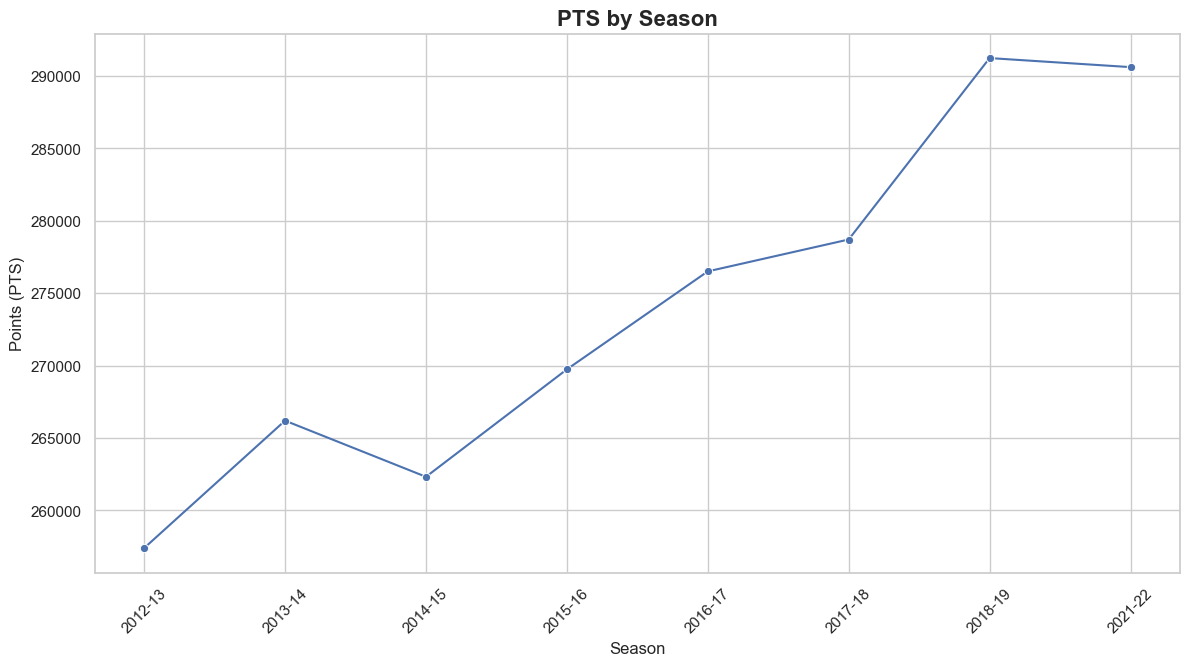

In [22]:
#Import seaborn
import seaborn as sns
sns.set_theme()

#Set Seaborn Style
sns.set(style='whitegrid')

#Plot PTS by season
plt.figure(figsize=(14,7))
sns.lineplot(x=stats_df['season'], y=stats_df['PTS'], marker='o')
plt.xticks(stats_df['season'], rotation=45)
plt.title('PTS by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Points (PTS)')
plt.show()

In [23]:
#Display max increase in pts and avg increase in pts 
pts_max_diff = np.nanmax(diff['PTS'])
pts_avg_increase = np.nanmean(diff['PTS'])
print('Maximum Increase: ' + str(pts_max_diff) + ' points, Average Increase: ' + str(pts_avg_increase) + ' points') 

Maximum Increase: 12527.0 points, Average Increase: 4744.0 points


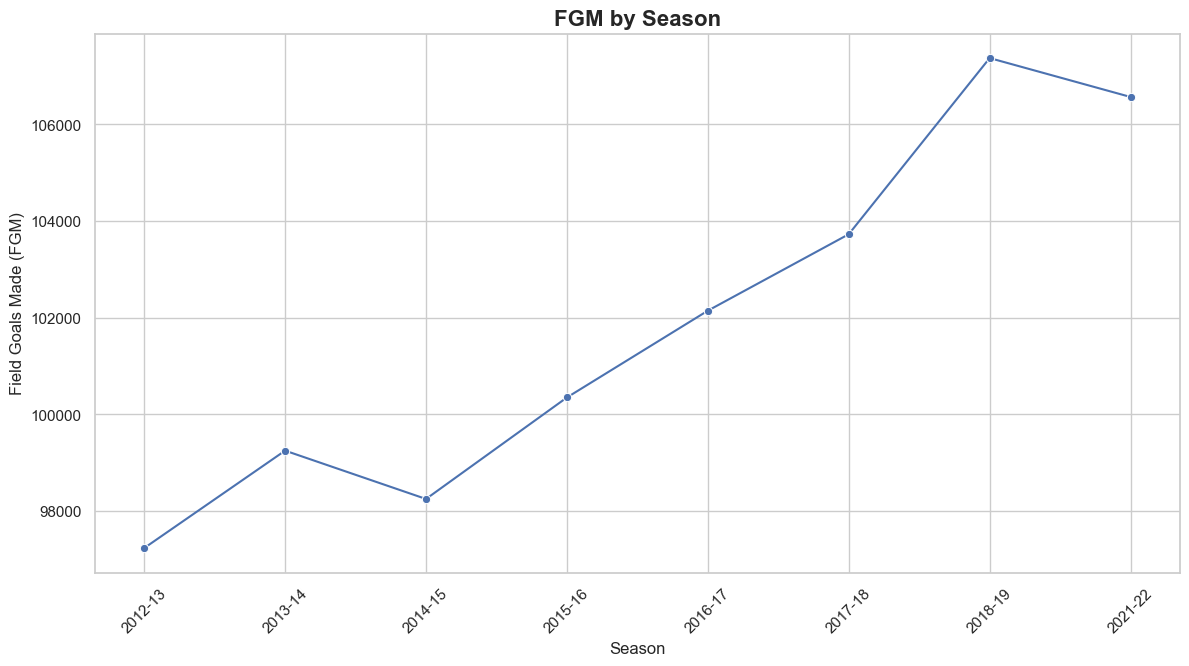

In [24]:
#Display FGM by season
plt.figure(figsize=(14,7))
sns.lineplot(x=stats_df['season'], y=stats_df['FGM'], marker='o')
plt.xticks(stats_df['season'], rotation=45)
plt.title('FGM by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Field Goals Made (FGM)')
plt.show()

In [25]:
#Display max increase in FGM and avg increase in FGM 
fgm_max_diff = np.nanmax(diff['FGM'])
fgm_avg_increase = np.nanmean(diff['FGM'])
print('Maximum Increase: ' + str(fgm_max_diff) + ' field goals, Average Increase: ' + str(fgm_avg_increase) + ' field goals') 

Maximum Increase: 3645.0 field goals, Average Increase: 1333.4285714285713 field goals


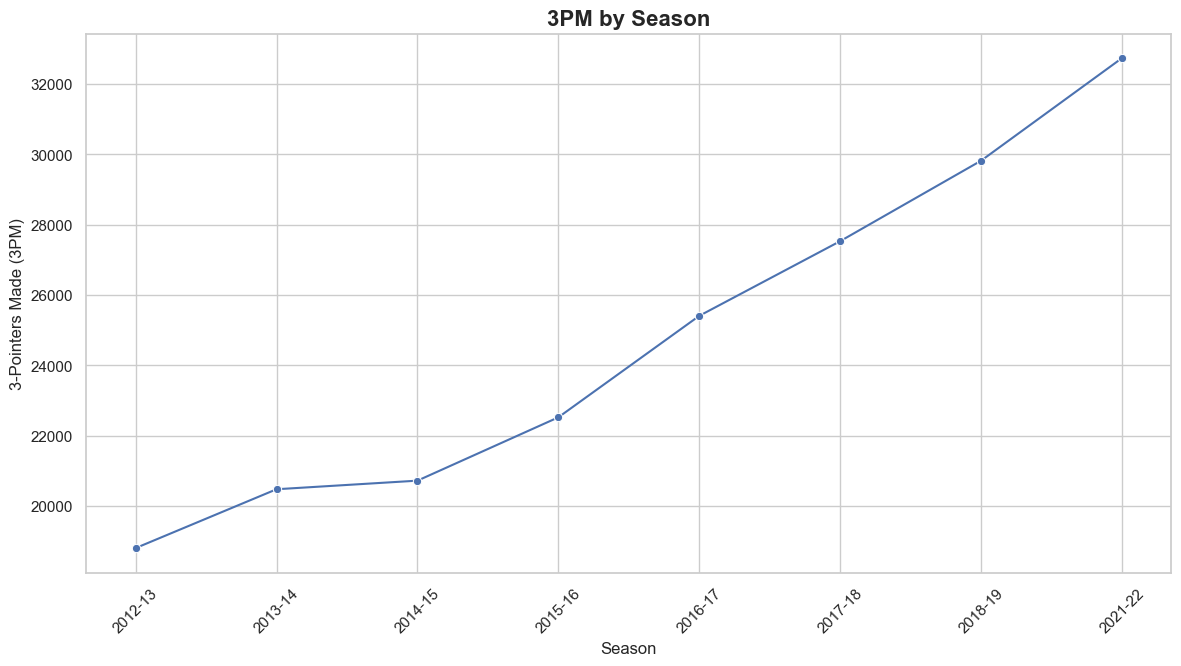

In [26]:
#Plot 3PM by season
plt.figure(figsize=(14,7))
sns.lineplot(x=stats_df['season'], y=stats_df['3PM'], marker='o')
plt.xticks(stats_df['season'], rotation=45)
plt.title('3PM by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('3-Pointers Made (3PM)')
plt.show()

In [27]:
#Display max increase in 3PM and avg increase in 3PM
threes_max_diff = np.nanmax(diff['3PM'])
threes_avg_increase = np.nanmean(diff['3PM'])
print('Maximum Increase: ' + str(threes_max_diff) + ' 3 pointers made, Average Increase: ' + str(threes_avg_increase) + ' 3 pointers made') 

Maximum Increase: 2916.0 3 pointers made, Average Increase: 1989.2857142857142 3 pointers made


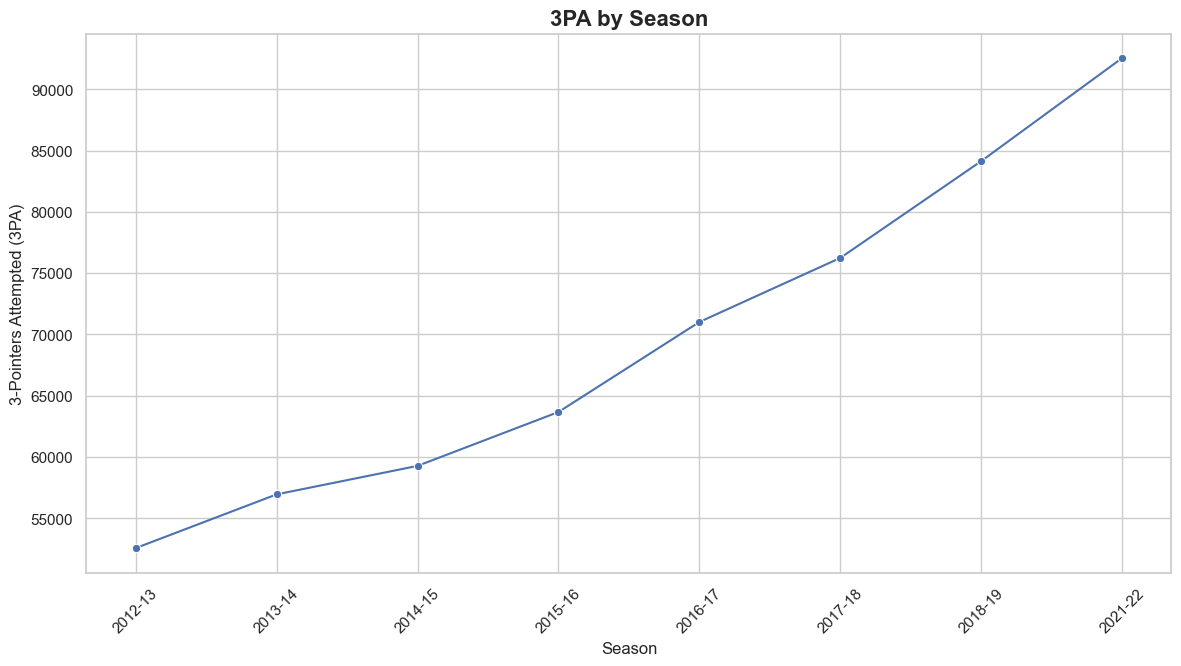

In [28]:
#Plot 3PA by season
plt.figure(figsize=(14,7))
sns.lineplot(x=stats_df['season'], y=stats_df['3PA'], marker='o')
plt.xticks(stats_df['season'], rotation=45)
plt.title('3PA by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('3-Pointers Attempted (3PA)')
plt.show()

In [29]:
#Display max increase in 3PA and avg increase in 3PA
threes_attempted_max_diff = np.nanmax(diff['3PA'])
threes_attempted_avg_increase = np.nanmean(diff['3PA'])
print('Maximum Increase: ' + str(threes_attempted_max_diff) + ' 3s attempted, Average Increase: ' + str(threes_attempted_avg_increase) + ' 3s attempted') 

Maximum Increase: 8409.0 3s attempted, Average Increase: 5711.857142857143 3s attempted


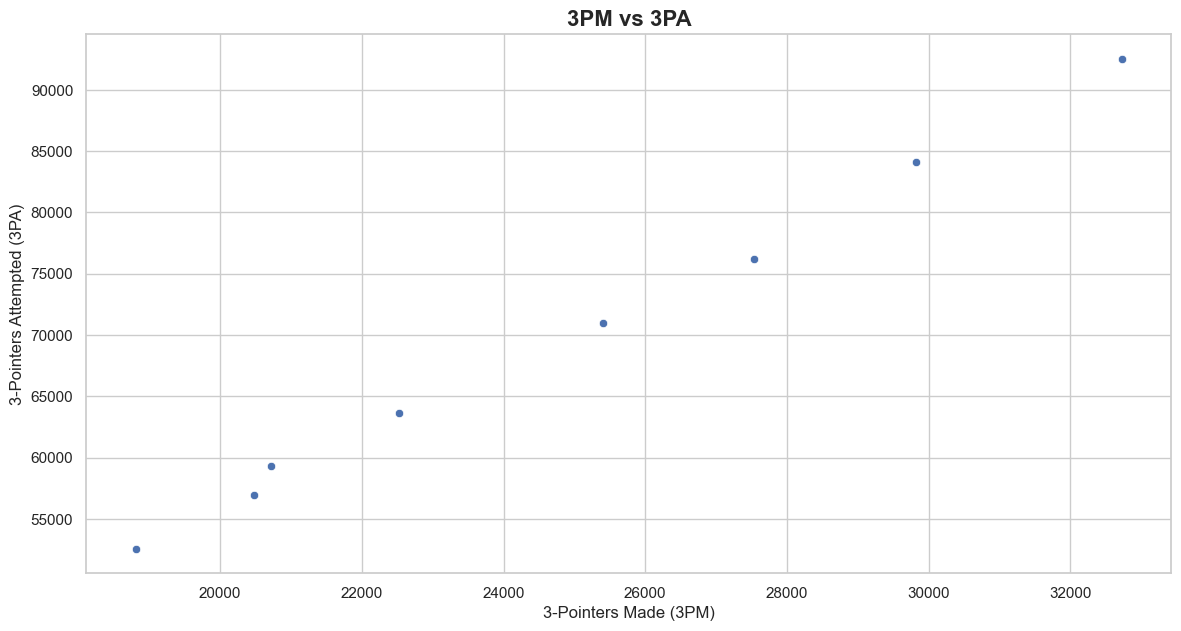

In [30]:
#Display scatter plot of 3PM vs 3PA
plt.figure(figsize=(14,7))
sns.scatterplot(x=stats_df['3PM'], y=stats_df['3PA'])
plt.title('3PM vs 3PA', fontsize=16, fontweight='bold')
plt.xlabel('3-Pointers Made (3PM)')
plt.ylabel('3-Pointers Attempted (3PA)')
plt.show()

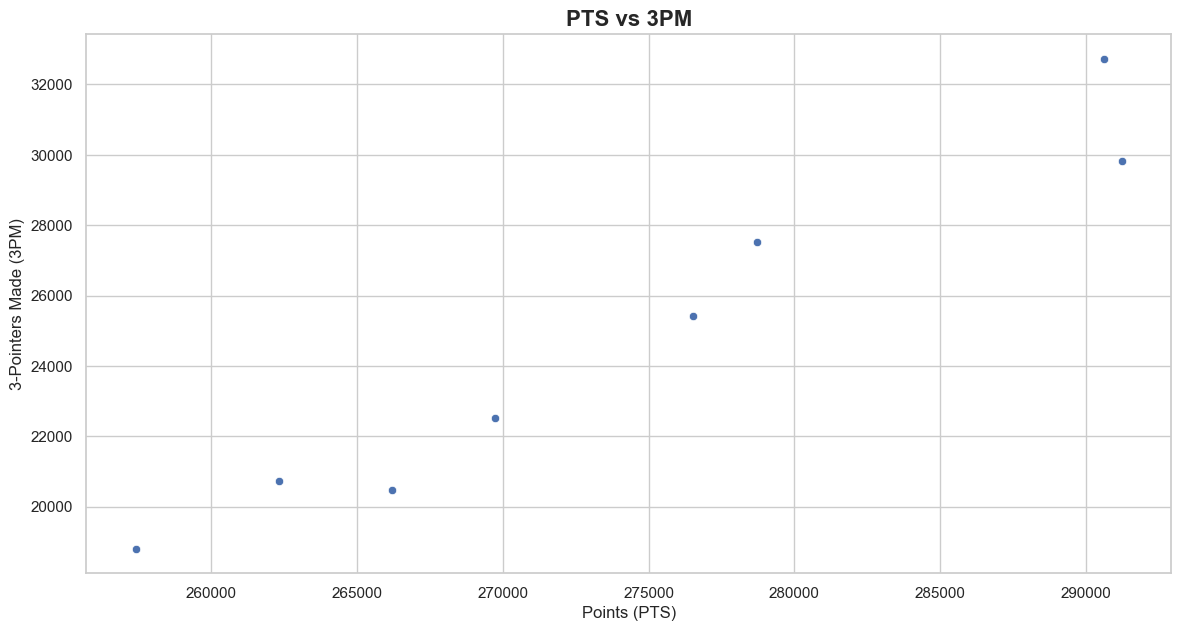

In [31]:
#Display scatter plot of PTS vs 3PM
plt.figure(figsize=(14,7))
sns.scatterplot(x=stats_df['PTS'], y=stats_df['3PM'])
plt.title('PTS vs 3PM', fontsize=16, fontweight='bold')
plt.xlabel('Points (PTS)')
plt.ylabel('3-Pointers Made (3PM)')
plt.show()

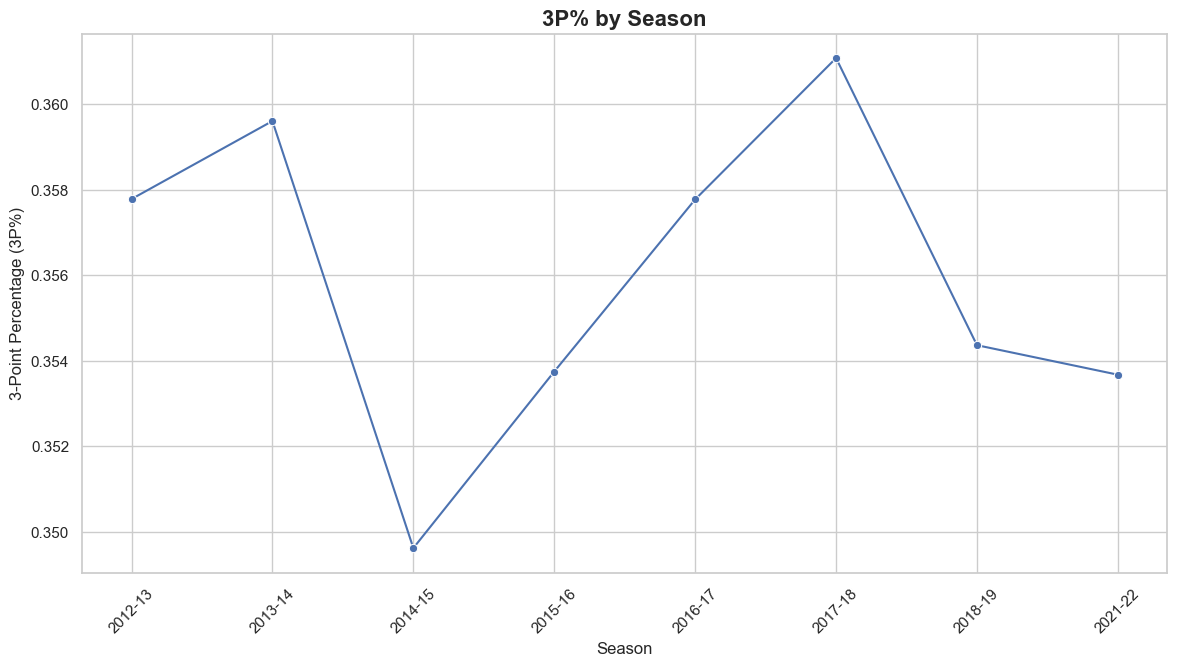

In [32]:
#Plot 3P% by season
plt.figure(figsize=(14,7))
sns.lineplot(x=stats_df['season'], y=stats_df['3P%'], marker='o')
plt.xticks(stats_df['season'], rotation=45)
plt.title('3P% by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('3-Point Percentage (3P%)')
plt.show()

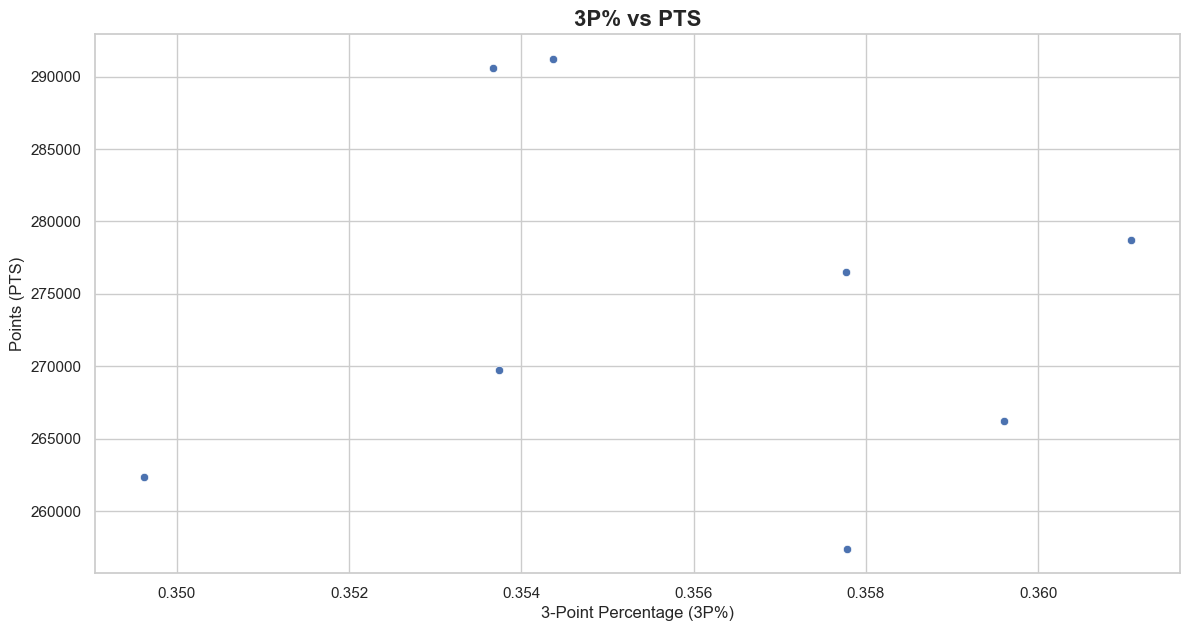

In [33]:
#Display scatter plot of 3P% vs PTS
plt.figure(figsize=(14,7))
sns.scatterplot(x=stats_df['3P%'], y=stats_df['PTS'])
plt.title('3P% vs PTS', fontsize=16, fontweight='bold')
plt.xlabel('3-Point Percentage (3P%)')
plt.ylabel('Points (PTS)')
plt.show()

Conclusion: Points per season have been increasing steadily, likely due to the increase in 3PM and 3PA over the years. Interestingly, 3P% has remained robust over the years suggesting 3P% does not make a big impact on the rise of points.